In [76]:
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:
base = pd.read_csv('/home/bernardo/Documentos/curso_Machine_A-Z/dataset/census.csv')

In [78]:
previsores = base.iloc[:,0:14].values
classe = base.iloc[:,14].values

In [79]:
encoder = LabelEncoder()
previsores[:,1] = encoder.fit_transform(previsores[:,1])
previsores[:,3] = encoder.fit_transform(previsores[:,3])
previsores[:,5] = encoder.fit_transform(previsores[:,5])
previsores[:,6] = encoder.fit_transform(previsores[:,6])
previsores[:,7] = encoder.fit_transform(previsores[:,7])
previsores[:,8] = encoder.fit_transform(previsores[:,8])
previsores[:,9] = encoder.fit_transform(previsores[:,9])
previsores[:,13] = encoder.fit_transform(previsores[:,13])

In [80]:
#com isso apresenta resultados ruim
onehot = OneHotEncoder(categorical_features = [1,3,5,6,7,8,9,13])
previsores = onehot.fit_transform(previsores).toarray()

/home/bernardo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/bernardo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [81]:
#classe = classe.reshape(-1,1)
enc_cla = LabelEncoder()
classe = enc_cla.fit_transform(classe)
classe.shape

(32561,)

In [82]:
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [83]:
xtrain, xtest, ytrain, ytest = train_test_split(previsores, classe, test_size=0.2, random_state=42)

In [84]:
clf = clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [85]:
pred = clf.predict(xtest)

In [86]:
accuracy_score(ytest,pred)

0.8152924919391985

In [87]:
matrix = confusion_matrix(ytest,pred)

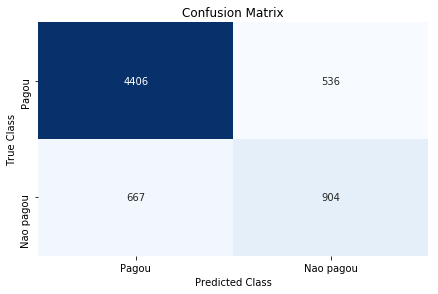

In [88]:
dataframe = pd.DataFrame(matrix, index=['Pagou','Nao pagou'], columns=['Pagou','Nao pagou'])
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues",fmt='g')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [50]:
import collections
collections.Counter(ytest)

Counter({0: 4942, 1: 1571})